<a href="https://colab.research.google.com/github/crowell97/ES2245/blob/main/es2245_lecture7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EARTHSC 2245: Lecture 7 - Stochastic Processes & The Normal Distribution

**Objective:** This notebook demonstrates the core concepts from Lecture 7, including:
1.  **Stochastic Processes:** Visualizing White Noise vs. Random Walks.
2.  **The Normal Distribution:** PDFs, CDFs, and the influence of Mean and Variance.
3.  **Higher Moments:** Visualizing Skewness and Kurtosis.
4.  **The Central Limit Theorem:** A practical demonstration.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Set plot style for better aesthetics
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

## Part 1: Stochastic Processes
A **stochastic process** is a collection of random variables indexed by time. In this section, we compare two fundamental error models discussed in the lecture.

### 1.1 White Noise
**White Noise** represents a sequence of uncorrelated random variables. It is "memory-less," meaning the value at time $t$ does not depend on the value at time $t-1$. This models random measurement errors (e.g., sensor flicker).

* **Mean ($\mu$):** 0
* **Variance ($\sigma^2$):** Finite (e.g., 1)

<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-4104175364.py:11: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(white_noise, color='steelblue', lw=1, label='White Noise $\epsilon_t$')


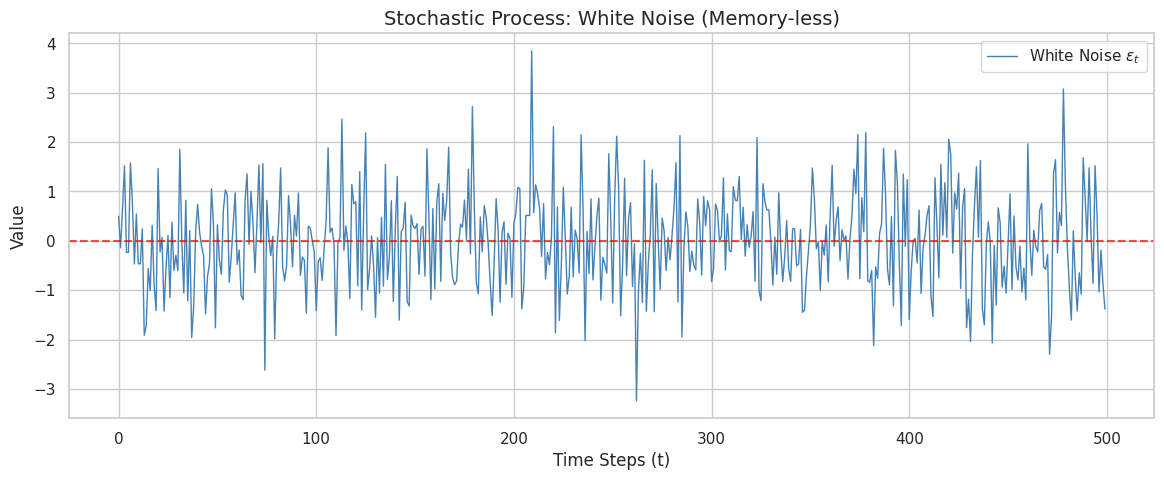

In [2]:
# Parameters
n_steps = 500
np.random.seed(42)  # For reproducibility

# Generate White Noise (Gaussian errors)
# Mean = 0, Std Dev = 1
white_noise = np.random.normal(loc=0, scale=1, size=n_steps)

# Plotting
plt.figure(figsize=(14, 5))
plt.plot(white_noise, color='steelblue', lw=1, label='White Noise $\epsilon_t$')
plt.axhline(0, color='red', linestyle='--', alpha=0.7)
plt.title('Stochastic Process: White Noise (Memory-less)', fontsize=14)
plt.xlabel('Time Steps (t)')
plt.ylabel('Value')
plt.legend()
plt.show()

### 1.2 Random Walk (Brownian Motion)
A **Random Walk** represents the accumulation of white noise over time. Unlike white noise, this process has "memory" because the current state depends entirely on the previous state plus a random shock. This is often used to model drift.

**Equation:**
$$X_t = X_{t-1} + \epsilon_t$$
where $\epsilon_t$ is white noise.

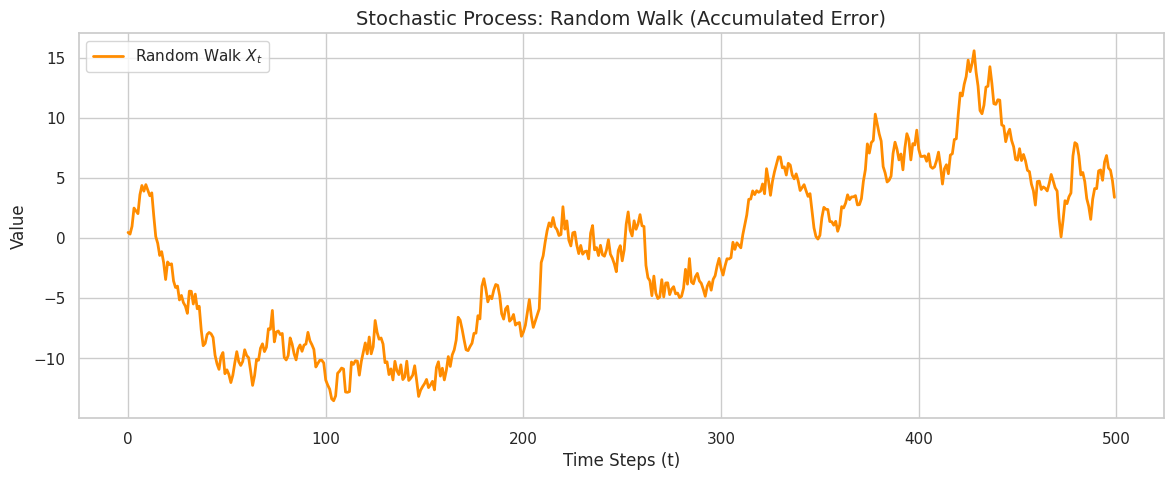

In [3]:
# Generate Random Walk by calculating the cumulative sum of the white noise
random_walk = np.cumsum(white_noise)

# Plotting
plt.figure(figsize=(14, 5))
plt.plot(random_walk, color='darkorange', lw=2, label='Random Walk $X_t$')
plt.title('Stochastic Process: Random Walk (Accumulated Error)', fontsize=14)
plt.xlabel('Time Steps (t)')
plt.ylabel('Value')
plt.legend()
plt.show()

## Part 2: The Normal (Gaussian) Distribution
The Normal distribution is the most important probability distribution in geostatistics. It is defined entirely by two parameters:
1.  **Mean ($\mu$):** The center of the distribution (1st Moment).
2.  **Variance ($\sigma^2$):** The spread of the distribution (2nd Moment).

**The PDF Equation:**
$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$

### 2.1 PDF: Influence of Variance
The **Probability Density Function (PDF)** shows the likelihood of a random variable falling within a particular range. Below, we visualize how changing the standard deviation ($\sigma$) affects the width and height of the "Bell Curve."

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-484499002.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, y, label=f'$\mu={mu}, \sigma={sigma}$')
/tmp/ipython-input-484499002.py:12: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, y, label=f'$\mu={mu}, \sigma={sigma}$')


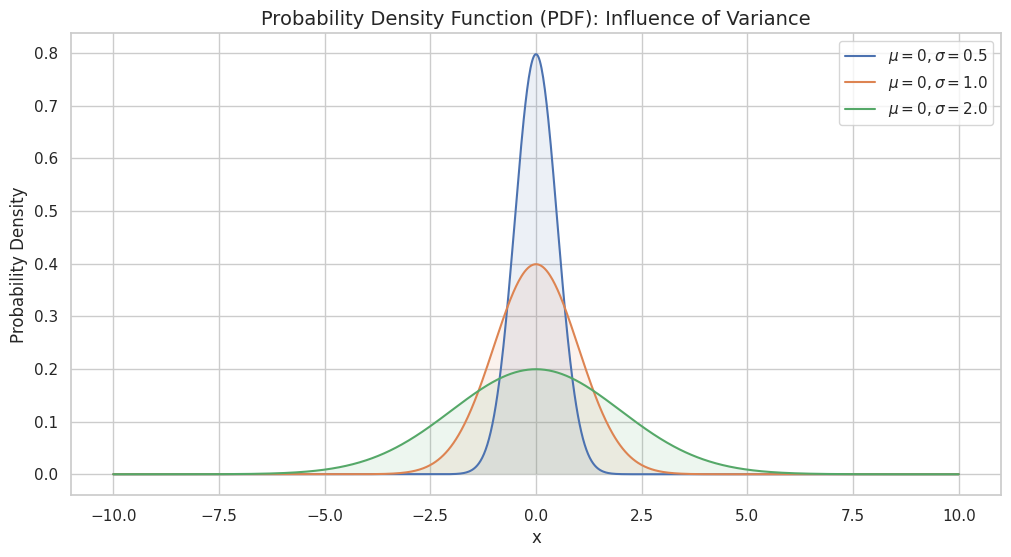

In [4]:
# Define x-axis range
x = np.linspace(-10, 10, 1000)

# Define different Normal Distributions
mu = 0
sigmas = [0.5, 1.0, 2.0]

plt.figure(figsize=(12, 6))

for sigma in sigmas:
    y = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, y, label=f'$\mu={mu}, \sigma={sigma}$')
    plt.fill_between(x, y, alpha=0.1)

plt.title('Probability Density Function (PDF): Influence of Variance', fontsize=14)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

### 2.2 PDF vs. CDF
The lecture distinguishes between two key functions used to describe probabilities:
* **PDF (Probability Density Function):** The height of the curve at $x$. The total area under the curve sums to 1.
* **CDF (Cumulative Density Function):** The probability that a variable takes a value **less than or equal to** $x$. It monotonically increases from 0 to 1.

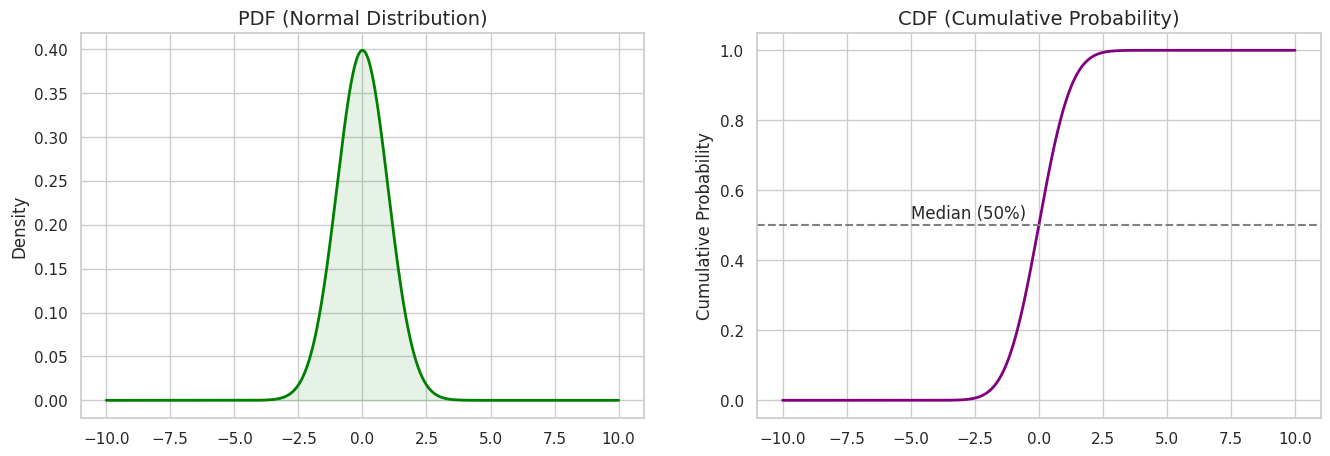

In [5]:
mu, sigma = 0, 1
y_pdf = stats.norm.pdf(x, mu, sigma)
y_cdf = stats.norm.cdf(x, mu, sigma)

fig, ax = plt.subplots(1, 2, figsize=(16, 5))

# Plot PDF
ax[0].plot(x, y_pdf, color='green', lw=2)
ax[0].fill_between(x, y_pdf, color='green', alpha=0.1)
ax[0].set_title(f'PDF (Normal Distribution)', fontsize=14)
ax[0].set_ylabel('Density')

# Plot CDF
ax[1].plot(x, y_cdf, color='purple', lw=2)
ax[1].set_title(f'CDF (Cumulative Probability)', fontsize=14)
ax[1].set_ylabel('Cumulative Probability')
ax[1].axhline(0.5, color='gray', linestyle='--')
ax[1].text(-5, 0.52, 'Median (50%)')

plt.show()

## Part 3: Higher Moments (Skewness & Kurtosis)
While the Mean (1st Moment) and Variance (2nd Moment) describe a perfect Normal distribution, real-world data often deviate from this ideal. We measure these deviations using higher moments:

* **Skewness (3rd Moment):** Measures asymmetry.
    * **0:** Perfectly symmetrical (Normal).
    * **Positive:** Tail extends to the right.
    * **Negative:** Tail extends to the left.
* **Kurtosis (4th Moment):** Measures "tailedness" or peakedness.
    * **Normal Distribution:** Kurtosis $\approx$ 3.

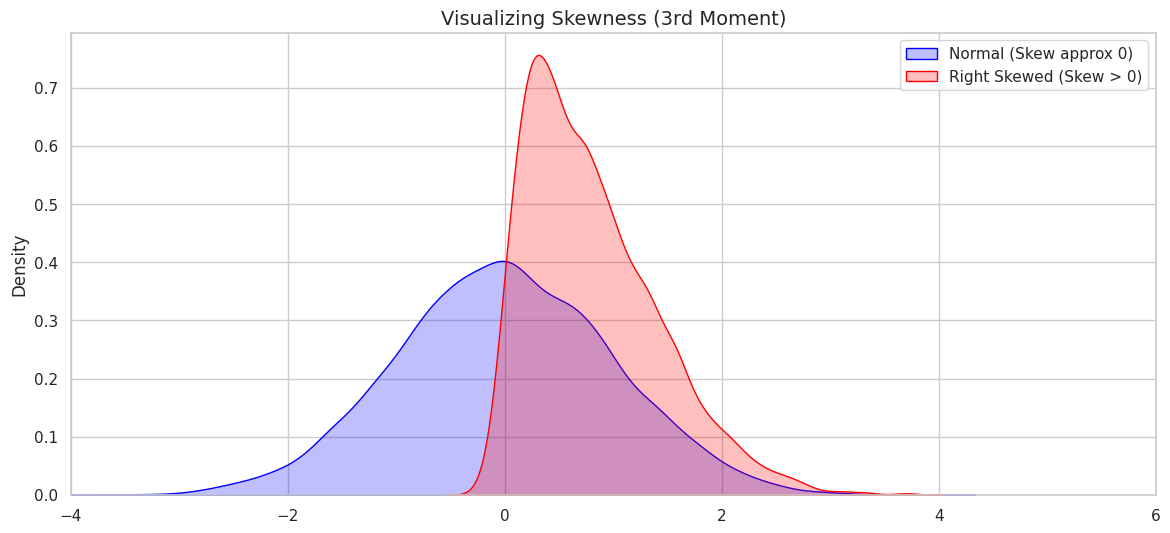

Skewness of Blue Dist: 0.02
Skewness of Red Dist: 0.93


In [8]:
# Generate data
norm_data = np.random.normal(0, 1, 10000)
skewed_data = stats.skewnorm.rvs(a=10, size=10000) # Positive skew

plt.figure(figsize=(14, 6))

# Plot Normal Data
sns.kdeplot(norm_data, fill=True, label=f'Normal (Skew approx 0)', color='blue')

# Plot Skewed Data
sns.kdeplot(skewed_data, fill=True, label=f'Right Skewed (Skew > 0)', color='red')

plt.title('Visualizing Skewness (3rd Moment)', fontsize=14)
plt.legend()
plt.xlim(-4, 6)
plt.show()

print(f"Skewness of Blue Dist: {stats.skew(norm_data):.2f}")
print(f"Skewness of Red Dist: {stats.skew(skewed_data):.2f}")

## Part 4: The Central Limit Theorem (CLT)
The **Central Limit Theorem** is a fundamental principle in statistics. It states that:

> Even if the underlying population distribution is **NOT** normal (e.g., Uniform, Exponential), the distribution of **sample means** will tend to be Normal, provided the sample size ($n$) is sufficiently large.

We will demonstrate this by:
1.  Creating a **Uniform Population** (flat distribution).
2.  Taking many random samples of varying sizes ($n$).
3.  Plotting the distribution of the means of those samples to see the "Bell Curve" emerge.

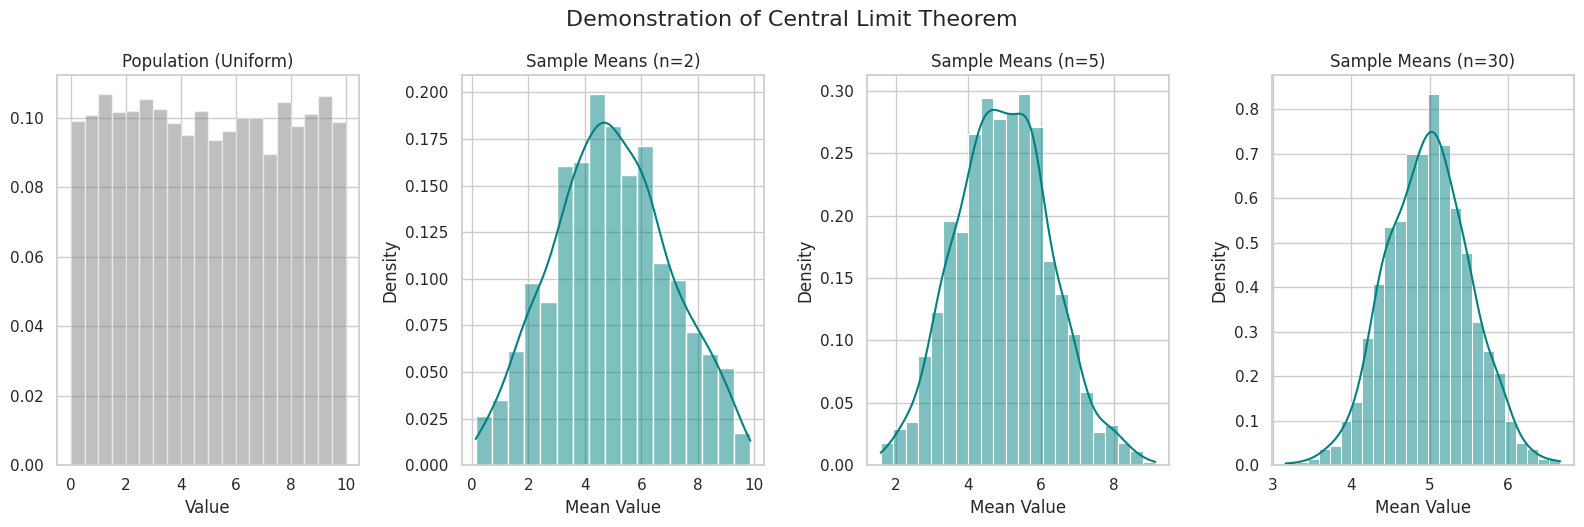

In [7]:
# 1. The Population: Uniform Distribution (Non-Normal)
pop_data = np.random.uniform(0, 10, 10000)

# 2. Take Samples and Calculate Means
sample_sizes = [2, 5, 30]
samples_to_take = 1000

plt.figure(figsize=(16, 5))

# Plot original population
plt.subplot(1, 4, 1)
plt.hist(pop_data, bins=20, color='gray', alpha=0.5, density=True)
plt.title('Population (Uniform)')
plt.xlabel('Value')

# Plot sample means for different sample sizes
for i, n in enumerate(sample_sizes):
    sample_means = []
    for _ in range(samples_to_take):
        # Take a random sample of size n
        sample = np.random.choice(pop_data, n)
        sample_means.append(np.mean(sample))

    plt.subplot(1, 4, i+2)
    sns.histplot(sample_means, kde=True, color='teal', stat="density")
    plt.title(f'Sample Means (n={n})')
    plt.xlabel('Mean Value')

plt.tight_layout()
plt.suptitle('Demonstration of Central Limit Theorem', y=1.05, fontsize=16)
plt.show()